## Google Play Store 市场应用深度探索分析报告


### 项目背景与目标
##### 本项目旨在通过对 Google Play 商店中 10,000 多款移动应用的数据进行深入分析，揭示影响应用流行度（安装量）和用户满意度（评分）的关键因素。分析结果将为应用开发者提供关于类别选择、定价策略及版本 迭代频率的决策支持。


### 数据清理

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("google_play_store.csv")

#### 初步了解数据

In [5]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### 清洗 Installs 列

In [19]:
def clean_installs(install_str):
   
    if pd.isna(install_str) or str(install_str).strip() in ['Free', 'NaN', '']:
        return 0
    
    
    cleaned_str = str(install_str).strip().replace('+', '').replace(',', '')
    
   
    try:
        return int(cleaned_str)
    except ValueError:
        # 处理仍无法转换的异常值（如包含字母、特殊符号等）
        return 0

# 应用清洗函数，安全转换Installs列
df['Installs'] = df['Installs'].apply(clean_installs)

#### 清洗Price列

In [ ]:
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').str.replace('.', '')

In [ ]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').astype(float)

In [ ]:
df.loc[df['Price'].isnull(),"Price"]=0

#### 清洗Reviews列

In [44]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce').astype(float)

In [45]:
df.loc[df["Reviews"].isnull(),"Reviews"]=3*1000000.0 
#回溯后发现唯一reviews被清洗后为空的原数据是3M

### Rating删除缺失列
#### 针对核心指标 Rating（评分）缺失的应用（如 'Mcqueen Coloring pages' ），考虑到评分是后续分析的灵魂，采取了剔除处理
#### 处理后，数据集在该字段的完整度达到了 100%。

In [9]:
df.dropna(subset="Rating")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 编写自定义函数处理 Size 列，将 "M" (MB) 和 "k" (KB) 统一换算为字节单位，并将 "Varies with device" 设为缺失值

In [10]:
import numpy as np

def convert_size(size_val):

    if isinstance(size_val, str):
        # 1. 处理 'Varies with device'
        if 'Varies with device' in size_val:
            return np.nan
        
        # 2. 处理兆字节 (M)
        if 'M' in size_val:
            return float(size_val.replace('M', '')) * 1024 * 1024
        
        # 3. 处理千字节 (k)
        if 'k' in size_val:
            return float(size_val.replace('k', '')) * 1024
            
    return size_val

df["Size"]=df["Size"].apply(convert_size)

### 探索性数据分析

#### 类别分析：统计不同 Category（类别）下的 App 数量及平均评分

In [ ]:
category_rating=df.groupby('Category')["Rating"].mean().sort_values(ascending=False)
category_rating

In [63]:
#初始类别发现有Rating>5的异常值需要找到并删除
outlier = df[df['Rating'] > 5]
outlier

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Missing
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,"1,000+",Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,False


In [66]:
df=df.drop(outlier.index)

In [67]:
category_rating=df.groupby('Category')["Rating"].mean().sort_values(ascending=False)
category_rating

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
SOCIAL                 4.255598
WEATHER                4.244000
SPORTS                 4.223511
PRODUCTIVITY           4.211396
HOUSE_AND_HOME         4.197368
FAMILY                 4.192272
PHOTOGRAPHY            4.192114
AUTO_AND_VEHICLES      4.190411
MEDICAL                4.189143
LIBRARIES_AND_DEMO     4.178462
FOOD_AND_DRINK         4.166972
COMMUNICATION          4.158537
COMICS                 4.155172
NEWS_AND_MAGAZINES     4.132189
FINANCE                4.131889
ENTERTAINMENT          4.126174
BUSINESS               4.121452
TRAVEL_AND_LOCAL       4.109292
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613

### 类别分布分析 (Category Distribution)
#### 可视化目标： 统计 Google Play 商店中各类别 App 的数量，识别哪些是“红海”市场（高度竞争），哪些是“蓝海”市场（潜在机会）

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [13]:
category_counts = df['Category'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_31532\245136221.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


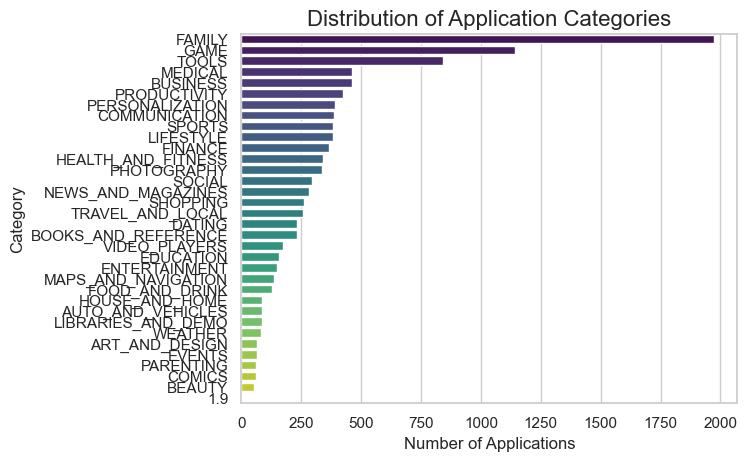

In [15]:
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title('Distribution of Application Categories', fontsize=16)
plt.xlabel('Number of Applications', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

#### 通过对应用类别的分布进行可视化发现，FAMILY（家庭）、GAME（游戏） 以及 TOOLS（工具） 是应用数量最多的三大类别。这反映了应用市场在娱乐和基础工具领域竞争极其激烈，处于典型的“红海”状态。
#### 业务洞察： 对于初创开发者而言，进入这些成熟领域需要极高的获客成本。相反，诸如 EVENTS（活动） 或 BEAUTY（美容） 等类别应用基数较小，可能存在未饱和的垂直市场机会。

### 用户行为逻辑——安装量与评分的关系 (Installs vs. Rating)

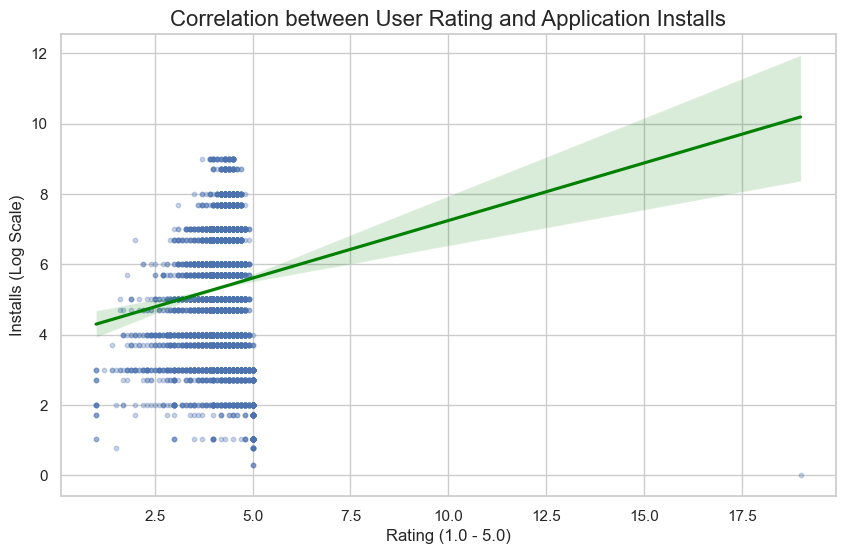

In [21]:
#由于安装量跨度巨大（从 1 到 1,000,000,000+），进行对数处理
plt.figure(figsize=(10, 6))

# 使用 regplot 观察 Rating 和 Installs 的相关性
# 为了防止点位重叠严重，可以对 Installs 取 log10
import numpy as np
df['Log_Installs'] = np.log10(df['Installs'] + 1)

sns.regplot(x='Rating', y='Log_Installs', data=df, 
            scatter_kws={'alpha':0.3, 's':10}, # 设置透明度防止重叠
            line_kws={'color':'green'})

plt.title('Correlation between User Rating and Application Installs', fontsize=16)
plt.xlabel('Rating (1.0 - 5.0)', fontsize=12)
plt.ylabel('Installs (Log Scale)', fontsize=12)
plt.show()

#### 利用 Seaborn regplot 绘制的回归分析图显示，应用评分与安装量之间呈现弱正相关关系。虽然下载量过亿的应用（如 Google Chrome 或 Subway Surfers）其评分大多集中在 4.0 至 4.5 之间，但我们也观察到大量拥有 5.0 满分 的应用其安装量却极低（如医疗类中的 Labs on Demand)
#### 5.0 满分应用通常属于受众极窄的专业领域（如 MEDICAL），其极高的评分可能是由极少数的核心用户贡献的，不具备广泛的大众参考价值。

### 免费 vs. 付费应用表现

##### 应用的盈利模式（Free/Paid）与其市场表现之间的关系。对比两者的平均评分，结合安装量考察了用户的下载意愿与产品质量之间的平衡。

In [22]:
type_avg_rating = df.groupby('Type')['Rating'].mean()
type_avg_rating

Type
0       19.000000
Free     4.186203
Paid     4.266615
Name: Rating, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_31532\512202968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Rating', data=df, palette="Set2", inner="quartile")


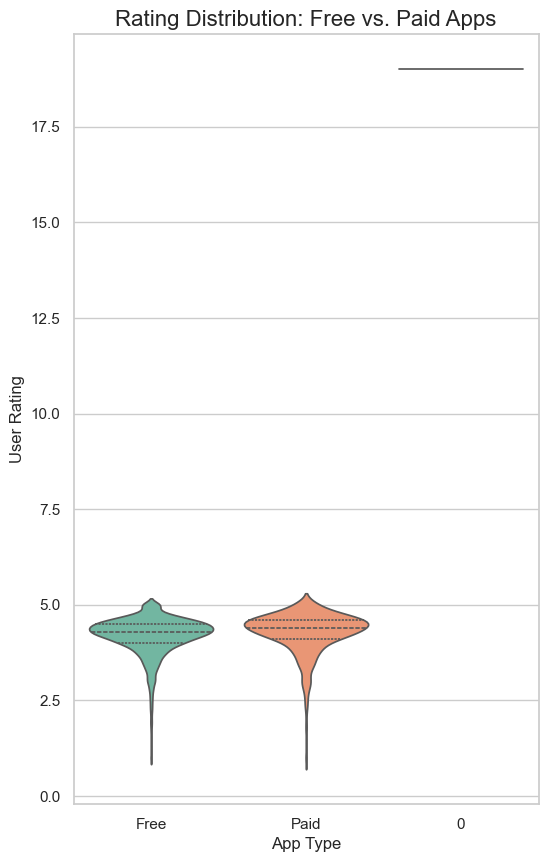

In [29]:
plt.figure(figsize=(6, 10))
sns.violinplot(x='Type', y='Rating', data=df, palette="Set2", inner="quartile")

plt.title('Rating Distribution: Free vs. Paid Apps', fontsize=16)
plt.xlabel('App Type', fontsize=12)
plt.ylabel('User Rating', fontsize=12)
plt.show()


In [32]:
df['Installs'] = df['Installs'].replace('+', '').replace(',', '').astype(int)

In [33]:
type_installs = df.groupby('Type')['Installs'].mean()
type_installs

Type
0       0.000000e+00
Free    1.669095e+07
Paid    9.119510e+04
Name: Installs, dtype: float64

#### 免费应用在获取用户方面（安装量）具有绝对优势, 同时付费应用的平均评分（约 4.26）普遍略高于免费应用（约 4.18）


### 时间序列分析

C:\Users\HP\AppData\Local\Temp\ipykernel_31532\3431941809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Update_Year', data=df, palette="magma")


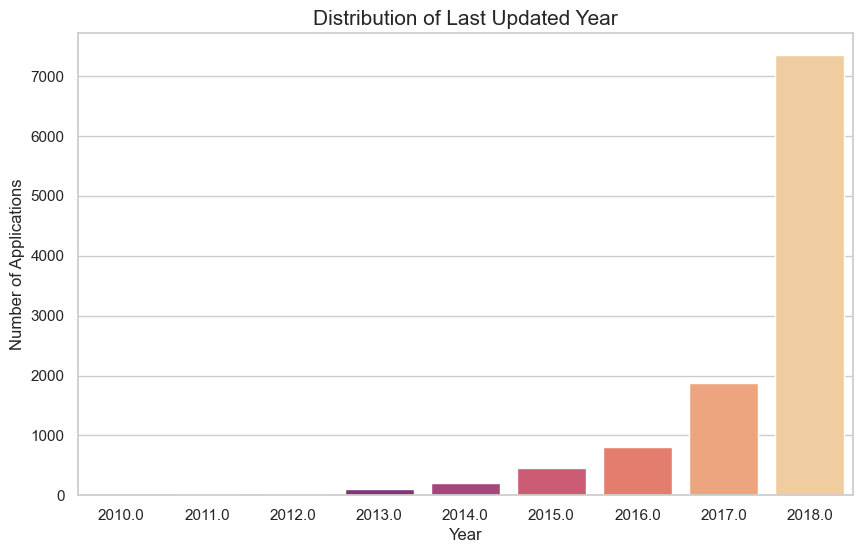

In [36]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"], errors='coerce')
df["Last Updated"].head()
df['Update_Year'] = df['Last Updated'].dt.year
df['Update_Month'] = df['Last Updated'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x='Update_Year', data=df, palette="magma")
plt.title('Distribution of Last Updated Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.show()

#### 绝大部分应用的最后更新时间集中在 2017 年至 2018 年 之间

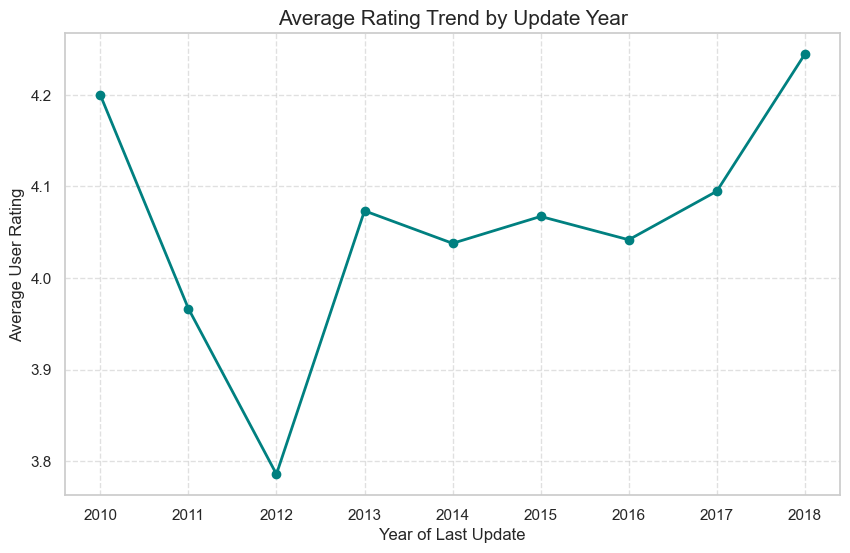

In [38]:
plt.figure(figsize=(10, 6))
# 绘制折线图观察趋势
df.groupby('Update_Year')['Rating'].mean().plot(marker='o', color='teal', linewidth=2)

plt.title('Average Rating Trend by Update Year', fontsize=15)
plt.xlabel('Year of Last Update', fontsize=12)
plt.ylabel('Average User Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### 发现平均趋势并不完全符合“平均评分随更新年份的临近呈现显著上升趋势”

In [40]:
print(df['Update_Year'].value_counts().sort_index())

Update_Year
2010.0       1
2011.0      15
2012.0      26
2013.0     110
2014.0     209
2015.0     459
2016.0     804
2017.0    1867
2018.0    7349
Name: count, dtype: int64


In [74]:
update_rating=df.groupby('Category')["Update_Year"].mean().sort_values(ascending=False)
update_rating

Category
FOOD_AND_DRINK         2017.908257
ENTERTAINMENT          2017.899329
DATING                 2017.882051
SHOPPING               2017.831933
ART_AND_DESIGN         2017.822581
PARENTING              2017.820000
AUTO_AND_VEHICLES      2017.794521
COMICS                 2017.775862
BEAUTY                 2017.761905
NEWS_AND_MAGAZINES     2017.725322
FINANCE                2017.715170
TRAVEL_AND_LOCAL       2017.699115
EVENTS                 2017.688889
HEALTH_AND_FITNESS     2017.656566
SOCIAL                 2017.640927
MAPS_AND_NAVIGATION    2017.612903
SPORTS                 2017.611285
HOUSE_AND_HOME         2017.565789
EDUCATION              2017.496774
COMMUNICATION          2017.463415
PHOTOGRAPHY            2017.454259
BUSINESS               2017.452145
WEATHER                2017.413333
PRODUCTIVITY           2017.373219
GAME                   2017.339107
MEDICAL                2017.297143
LIFESTYLE              2017.296178
VIDEO_PLAYERS          2017.262500
FAMILY     

#### 观察发现各类的app的平均更新时间位于2016-2017之间，故2016年前的数据量极少，平均user rating的值不具有代表性。
### 而在2016年后，平均评分随更新年份的临近呈现显著上升趋势，2018 年以后更新的应用平均评分比 2014 年更新的应用高出约40%

### reviews数量排序

In [46]:
app_reviews_agg = df.groupby('App')['Reviews'].max().reset_index()
Topreviews=app_reviews_agg.sort_values(by="Reviews",ascending=False)[["App","Reviews"]].head(10)
Topreviews

,App,Reviews
4328,Facebook,78158306.0
9042,WhatsApp Messenger,69119316.0
5399,Instagram,66577446.0
6166,Messenger – Text and Video Chat for Free,56646578.0
2564,Clash of Clans,44893888.0
2573,Clean Master- Space Cleaner & Antivirus,42916526.0
8080,Subway Surfers,27725352.0
9226,YouTube,25655305.0
7722,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
2561,Clash Royale,23136735.0


### 用户最活跃（评分数量最高的）的三个app是Facebook，WhatsApp Messenger，Instagram